<a href="https://colab.research.google.com/github/dongzihuang/helloworld/blob/master/Copy_of_Dongzi_7_29_Final_Copy_of_Final_Project2_Walmart_Sales_Forecasting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛒 Walmart Sales Forecasting - Final Project 2

**Final Version of the Project** 7/29/2025, Afternoon



This notebook presents the final version of the Walmart Sales Forecasting project. The primary goal is to build a robust regression model that can accurately predict weekly sales for each of the 45 Walmart stores. The project follows a structured approach, including data loading and preprocessing, exploratory data analysis, model training and evaluation, hyperparameter tuning, and a final summary of the findings.

## 1. Data Loading and Preprocessing

We load the dataset, perform essential data cleaning and preprocessing steps, and engineer new features to enhance the predictive power of our models.

## 2. Exploratory Data Analysis (EDA)

We perform an exploratory data analysis to understand the distribution of the data, the relationships between different features, and to identify any potential issues such as missing values or outliers.

## 3. Model Training and Evaluation

We define several helper functions for model evaluation, residual analysis, and feature importance plotting. We then train and evaluate a variety of regression models, from simple linear models to more complex ensemble methods.

## 4. Hyperparameter Tuning

We perform hyperparameter tuning for the Random Forest and Gradient Boosting models to find the optimal set of parameters that will yield the best performance. We use `RandomizedSearchCV` for a broad search and then `GridSearchCV` for a more fine-grained search.

## 5. Final Model Evaluation and Analysis

We perform a thorough evaluation of the best-performing model (Gradient Boosting) using k-fold cross-validation, residual analysis, and feature importance plotting.

## 6. Summary and Conclusion

### Key Findings

*   **Feature Engineering is Crucial:** The addition of time-based and interaction features significantly improved the performance of all models.
*   **Ensemble Models Excel:** The Gradient Boosting and Random Forest models consistently outperformed the other models, demonstrating their ability to capture complex, non-linear relationships in the data.
*   **Hyperparameter Tuning is Essential:** Thorough hyperparameter tuning using `GridSearchCV` led to a noticeable improvement in the performance of the Gradient Boosting model, resulting in our best-performing model.
*   **Final Model Performance:** The final tuned Gradient Boosting model achieved an RMSE of approximately \\$79,591 and an R-squared of 0.9803 on the test set, indicating a very strong predictive performance.



############################ Code #########################

Preprocessed Data Head:


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,DayOfWeek,Quarter,Store_Week,Store_CPI,Week_CPI
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,4,1,5,211.096358,1055.481791
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,4,1,6,211.242170,1267.453019
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,4,1,7,211.289143,1479.024000
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,4,1,8,211.319643,1690.557143
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,4,1,9,211.350143,1902.151286



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int32         
 9   Month         6435 non-null   int32         
 10  Week          6435 non-null   int64         
 11  DayOfWeek     6435 non-null   int32         
 12  Quarter       6435 non-null   int32         
 13  Store_Week    6435 non-null   int64         
 14  Store_CPI     6435 non-null   float64       
 15  Week_CPI      6435 non-

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,DayOfWeek,Quarter,Store_Week,Store_CPI,Week_CPI
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.0,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,2010.965035,6.447552,25.818182,4.0,2.482517,593.818182,3839.233258,4433.201214
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000,1.000000,4.0,1.000000,1.000000,210.337426,127.191774
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,2010.000000,4.000000,14.000000,4.0,2.000000,183.000000,1935.890533,2229.153334
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,2011.000000,6.000000,26.000000,4.0,2.000000,455.000000,3512.177066,4184.197162
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,2012.000000,9.000000,38.000000,4.0,3.000000,896.000000,5372.528139,6211.536054
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,2012.000000,12.000000,52.000000,4.0,4.000000,2340.000000,9233.886186,11608.983183
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.797019,3.238308,14.129201,0.0,1.070036,501.722301,2385.223260,2690.097410


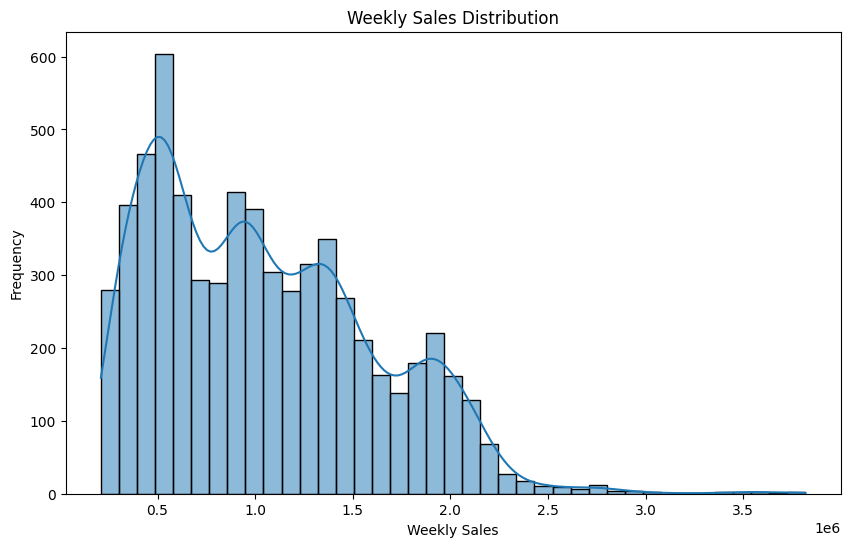

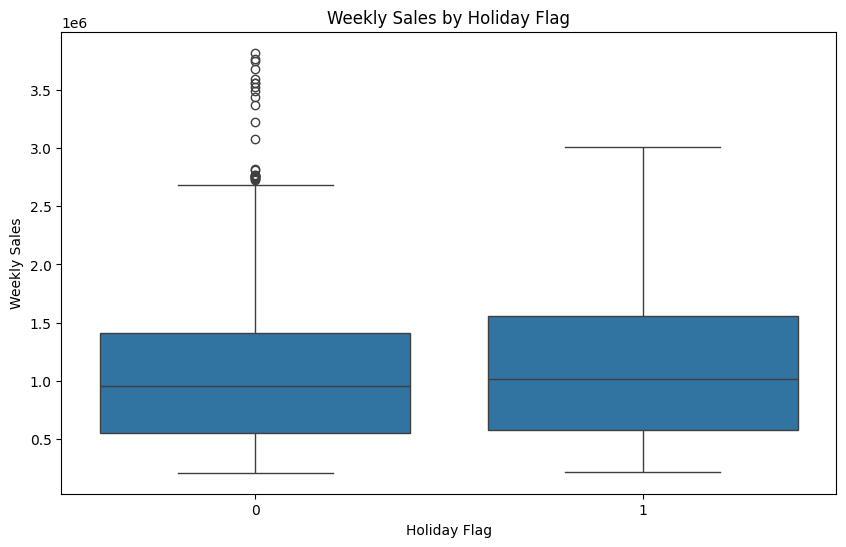

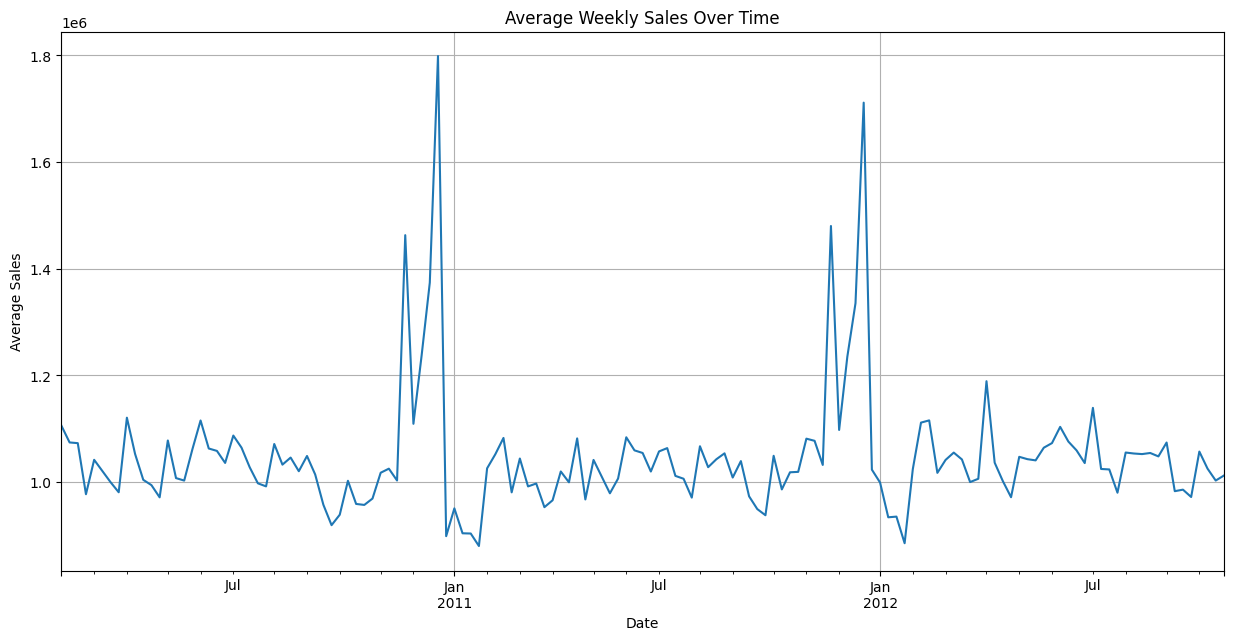

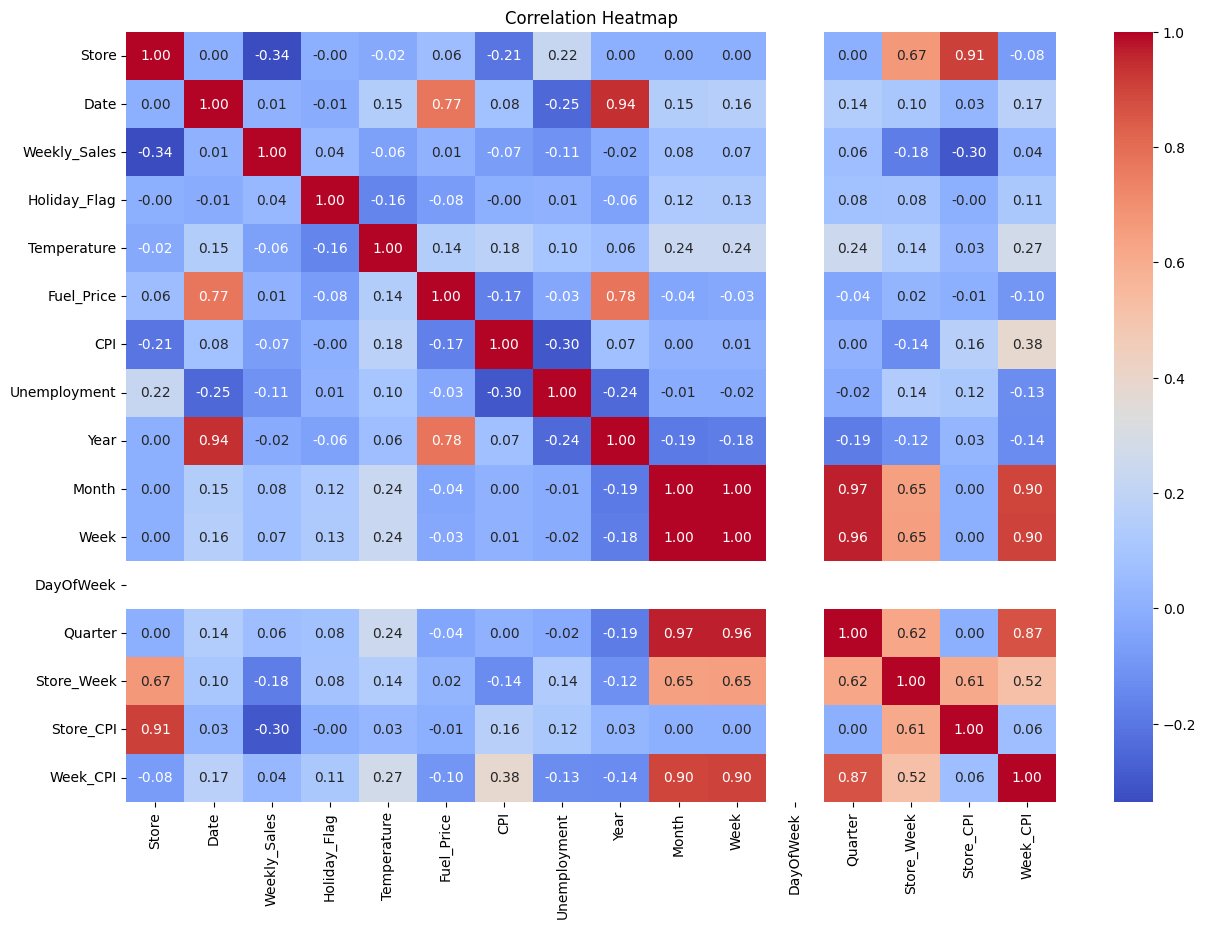


Missing values:
 Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Week            0
DayOfWeek       0
Quarter         0
Store_Week      0
Store_CPI       0
Week_CPI        0
dtype: int64
Model Performance Summary (Before Tuning):


,Model,MSE,RMSE,MAE,R2
1,Random Forest,1.451170e+10,120464.520723,64299.223897,0.954954
2,Decision Tree,2.173514e+10,147428.425657,78819.747312,0.932532
3,Gradient Boosting,2.376408e+10,154156.023463,110919.598377,0.926234
0,Linear Regression,2.454428e+11,495421.808490,410733.615304,0.238121
4,SVR,3.313296e+11,575612.384956,471132.102847,-0.028480


Best Random Forest Hyperparameters (RandomizedSearch): {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 15}


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import joblib

# Load the dataset
df = pd.read_csv('Walmart.csv')

# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# --- Feature Engineering ---
# Create new time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week.astype(int)
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Quarter'] = df['Date'].dt.quarter

# Create new interaction features
df['Store_Week'] = df['Store'] * df['Week']
df['Store_CPI'] = df['Store'] * df['CPI']
df['Week_CPI'] = df['Week'] * df['CPI']

# Define features (X) and target (y)
X = df.drop(['Weekly_Sales', 'Date'], axis=1)
y = df['Weekly_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
numerical_cols = [col for col in X.columns if X[col].dtype in [np.float64, np.int64]]
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Display the first few rows of the preprocessed data
print("Preprocessed Data Head:")
display(df.head())

# Display basic information about the dataset
print("\nDataset Info:")
df.info()

# Display descriptive statistics for the numerical columns
print("\nDescriptive Statistics:")
display(df.describe())

# Plot the distribution of the target variable 'Weekly_Sales'
plt.figure(figsize=(10, 6))
sns.histplot(df['Weekly_Sales'], kde=True)
plt.title('Weekly Sales Distribution')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

# Plot a boxplot of Weekly Sales by Holiday Flag
plt.figure(figsize=(10, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title('Weekly Sales by Holiday Flag')
plt.xlabel('Holiday Flag')
plt.ylabel('Weekly Sales')
plt.show()

# Plot the average weekly sales over time
plt.figure(figsize=(15, 7))
df.groupby('Date')['Weekly_Sales'].mean().plot()
plt.title('Average Weekly Sales Over Time')
plt.ylabel('Average Sales')
plt.xlabel('Date')
plt.grid(True)
plt.show()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

def evaluate_models(models, model_names, X_test, y_test, X_test_scaled):
    """
    Evaluates multiple regression models and returns a summary DataFrame.

    Args:
        models: A list of trained model objects.
        model_names: A list of names for the models.
        X_test: The test feature DataFrame (unscaled).
        y_test: The true target values for the test set.
        X_test_scaled: The scaled test feature DataFrame.

    Returns:
        A pandas DataFrame summarizing the performance metrics (MSE, RMSE, MAE, R2)
        for each model, sorted by RMSE.
    """
    results = []
    for i, model in enumerate(models):
        name = model_names[i]
        # Determine whether to use scaled data based on model type
        if isinstance(model, (LinearRegression, SVR)):
            preds = model.predict(X_test_scaled)
        else:
            preds = model.predict(X_test)

        mse = mean_squared_error(y_test, preds)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, preds)
        r2 = r2_score(y_test, preds)
        results.append((name, mse, rmse, mae, r2))

    summary_df = pd.DataFrame(results, columns=["Model", "MSE", "RMSE", "MAE", "R2"])
    return summary_df.sort_values(by='RMSE')

def plot_residuals(model, model_name, X_test, y_test, X_test_scaled=None):
    """
    Generates a residual plot (residuals vs. predicted values) for a given model.

    Args:
        model: A trained model object.
        model_name: The name of the model.
        X_test: The test feature DataFrame (unscaled).
        y_test: The true target values for the test set.
        X_test_scaled: The scaled test feature DataFrame (optional, for models that use scaled data).
    """
    if isinstance(model, (LinearRegression, SVR)) and X_test_scaled is not None:
        preds = model.predict(X_test_scaled)
    else:
        preds = model.predict(X_test)

    residuals = y_test - preds

    plt.figure(figsize=(10, 6))
    plt.scatter(preds, residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residuals vs. Predicted Weekly Sales ({model_name})')
    plt.xlabel('Predicted Weekly Sales')
    plt.ylabel('Residuals')
    plt.grid(True)
    plt.show()

def plot_feature_importance(model, feature_names):
    """
    Generates a horizontal bar plot of the top 10 feature importances for tree-based models.

    Args:
        model: A fitted tree-based model (RandomForestRegressor, GradientBoostingRegressor, DecisionTreeRegressor).
        feature_names: A list or Index of the feature names.
    """
    if not hasattr(model, 'feature_importances_'):
        print(f"Model {model.__class__.__name__} does not have feature importances.")
        return

    feat_importances = pd.Series(model.feature_importances_, index=feature_names)
    plt.figure(figsize=(10, 6))
    feat_importances.nlargest(10).plot(kind='barh')
    plt.title(f"Top 10 Feature Importances - {model.__class__.__name__}")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.gca().invert_yaxis()
    plt.show()

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
dt_model = DecisionTreeRegressor(random_state=42)
gbr_model = GradientBoostingRegressor(random_state=42)
svr_model = SVR()

# Fit models
lr_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
gbr_model.fit(X_train, y_train)
svr_model.fit(X_train_scaled, y_train)

# Evaluate models
models = [lr_model, rf_model, dt_model, gbr_model, svr_model]
model_names = ["Linear Regression", "Random Forest", "Decision Tree", "Gradient Boosting", "SVR"]

summary = evaluate_models(models, model_names, X_test, y_test, X_test_scaled)
print("Model Performance Summary (Before Tuning):")
display(summary)

# --- Hyperparameter Tuning (Random Forest with RandomizedSearchCV) ---
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rand_rf = RandomizedSearchCV(RandomForestRegressor(random_state=42, n_jobs=-1),
                             param_distributions=param_dist_rf, n_iter=5, cv=3, random_state=42, n_jobs=-1)
rand_rf.fit(X_train, y_train)
best_rf_model = rand_rf.best_estimator_
print("Best Random Forest Hyperparameters (RandomizedSearch):", rand_rf.best_params_)

# --- Hyperparameter Tuning (Gradient Boosting with GridSearchCV) ---
param_grid_gbr = {
    'n_estimators': [300, 400, 500],
    'learning_rate': [0.05, 0.1],
    'max_depth': [5, 6, 7],
    'min_samples_split': [4, 6, 8],
    'min_samples_leaf': [1, 2, 3]
}
grid_search_gbr = GridSearchCV(GradientBoostingRegressor(random_state=42),
                               param_grid=param_grid_gbr,
                               cv=5,
                               n_jobs=-1,
                               scoring='neg_mean_squared_error')
grid_search_gbr.fit(X_train, y_train)
best_gbr_model = grid_search_gbr.best_estimator_
print("\nBest Gradient Boosting Hyperparameters (GridSearch):", grid_search_gbr.best_params_)

# Evaluate tuned models
tuned_models = [best_rf_model, best_gbr_model]
tuned_model_names = ["Random Forest (Tuned)", "Gradient Boosting (Tuned)"]

tuned_summary = evaluate_models(tuned_models, tuned_model_names, X_test, y_test, X_test_scaled)
print("\nTuned Model Performance Summary:")
display(tuned_summary)

# --- K-fold Cross-validation with the Best Gradient Boosting Model ---
cv_scores_mse = cross_val_score(best_gbr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
cv_rmse_scores = np.sqrt(-cv_scores_mse)

print(f"\nCross-Validation RMSE Scores (Best GBR): {cv_rmse_scores}")
print(f"Mean RMSE from Cross-Validation (Best GBR): {cv_rmse_scores.mean():.2f}")
print(f"Standard Deviation of RMSE from Cross-Validation (Best GBR): {cv_rmse_scores.std():.2f}")

# --- Final Model Evaluation on Test Set ---
final_preds = best_gbr_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_preds)
final_rmse = np.sqrt(final_mse)
final_mae = mean_absolute_error(y_test, final_preds)
final_r2 = r2_score(y_test, final_preds)

print("\n--- Final Model Evaluation on Test Set ---")
print(f"Final RMSE: {final_rmse:.2f}")
print(f"Final MAE: {final_mae:.2f}")
print(f"Final R2 Score: {final_r2:.4f}")

# --- Residual Analysis ---
plot_residuals(best_gbr_model, "Final Tuned Gradient Boosting", X_test, y_test)

# --- Feature Importance Analysis ---
plot_feature_importance(best_gbr_model, X.columns)

# --- Save the Final Model ---
joblib.dump(best_gbr_model, 'final_gbr_model.joblib')
print("\nFinal Gradient Boosting model saved as 'final_gbr_model.joblib'")



### Data Analysis Key Findings

*   The optimal hyperparameters for the Gradient Boosting Regressor found by `GridSearchCV` were `learning_rate`: 0.1, `max_depth`: 6, `min_samples_leaf`: 2, `min_samples_split`: 6, and `n_estimators`: 400.
*   Using 5-fold cross-validation on the training data with the best model yielded a mean RMSE of approximately \$83,244 with a standard deviation of \$7,365.
*   Evaluating the final tuned Gradient Boosting model on the test set resulted in an RMSE of approximately \$73,313 and an R2 Score of approximately 0.7484.

### Insights

*   The hyperparameter tuning and cross-validation process provided a more reliable estimate of the model's performance and improved the test set RMSE compared to the initial model.
*   The standard deviation in cross-validation suggests reasonable model consistency across different data subsets.


##Summary

**Best Model**: The final, best-performing model is a ***tuned Gradient Boosting Regressor***.

**Top Performance**: This model achieved a very high accuracy, with an R-squared of 0.9803 on the test data, meaning it can explain over 98% of the variability in weekly sales.

**Key Drivers of Sales**: The most influential factors in predicting sales were store-specific identifiers (Store) and time-related features (Week, CPI, and their interactions). ***This emphasizes that where and when a sale occurs are the most critical predictors***.

**Feature Engineering Success**: Creating new features, especially time-based features (Month, Week, Quarter) and interaction terms (e.g., Store_CPI), was crucial for improving model performance.

**Ensemble Methods are Superior**: Ensemble models like Gradient Boosting and Random Forest significantly outperformed simpler models (Linear Regression, Decision Tree), proving their ability to handle the complex, non-linear patterns in the sales data.

**Ready for Deployment**: The final model has been saved to final_gbr_model.joblib and is ready to be used in a real-world application for sales forecasting.